## Import libraries

In [3]:

from torch import cuda
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
tqdm.pandas()

### Load the data

In [4]:
df = pd.read_csv('/kaggle/input/fake-reviews-dataset/fake_reviews_dataset.csv')
df.head()

,category,rating,text,label
0,Home_and_Kitchen,5.0,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen,5.0,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen,5.0,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen,1.0,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen,5.0,Very nice set. Good quality. We have had the s...,1


In [5]:
df['label'].value_counts()

label
1    20294
0    20232
Name: count, dtype: int64

In [6]:
df['text']

0        Love this!  Well made, sturdy, and very comfor...
1        love it, a great upgrade from the original.  I...
2        This pillow saved my back. I love the look and...
3        Missing information on how to use it, but it i...
4        Very nice set. Good quality. We have had the s...
                               ...                        
40521    The shampoo has a pleasant scent and cleans we...
40522    The jacket is stylish but not very warm. As pe...
40523    The running shoes provide excellent support. A...
40524    The pasta cooks perfectly every time. Accordin...
40525    The car freshener has a strong scent. As per a...
Name: text, Length: 40526, dtype: object

In [8]:
df.drop(['category','rating'],inplace=True,axis=1)

In [9]:
df

,text,label
0,"Love this! Well made, sturdy, and very comfor...",1
1,"love it, a great upgrade from the original. I...",1
2,This pillow saved my back. I love the look and...,1
3,"Missing information on how to use it, but it i...",1
4,Very nice set. Good quality. We have had the s...,1
...,...,...
40521,The shampoo has a pleasant scent and cleans we...,1
40522,The jacket is stylish but not very warm. As pe...,1
40523,The running shoes provide excellent support. A...,1
40524,The pasta cooks perfectly every time. Accordin...,1


In [6]:
import pandas as pd
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, recall_score, precision_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
def remove_url(text):
    return re.sub(r"http\S+", "", text)

exclude =string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "" , exclude))

In [9]:
stopwords= stopwords.words('english')
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
            

In [8]:
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [10]:
def preprocess(train_data):
    train_data['text']=train_data['text'].str.lower()
    train_data['text'] = train_data['text'].apply(remove_url)#remove url
    train_data['text']=train_data['text'].apply(remove_punctuation)# remove punctuation
    train_data['text']=train_data['text'].apply(remove_stopwords)
    train_data['text'] = train_data['text'].apply(lemmatize_text)

In [11]:
preprocess(df)

In [12]:
df

,category,rating,text,label
0,Home_and_Kitchen,5.0,love well made sturdy comfortable love itvery ...,1
1,Home_and_Kitchen,5.0,love great upgrade original ive mine couple year,1
2,Home_and_Kitchen,5.0,pillow saved back love look feel pillow,1
3,Home_and_Kitchen,1.0,missing information use great product price,1
4,Home_and_Kitchen,5.0,nice set good quality set two month,1
...,...,...,...,...
40521,Beauty,4.0,shampoo pleasant scent clean well virtual assi...,1
40522,Clothing,3.0,jacket stylish warm per aigenerated review sui...,1
40523,Sporting Goods,5.0,running shoe provide excellent support automat...,1
40524,Food,4.0,pasta cook perfectly every time according ai r...,1


In [17]:
X_train , X_test , y_train, y_test = train_test_split(df['text'],df['label'],test_size=0.2)

In [18]:
X_train.shape

(32420,)

In [20]:
tfidf_vectorizer = TfidfVectorizer()

    # Fit-transform the  data
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)
test_tf = tfidf_vectorizer.transform(X_test)
filename = 'tfidf_vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(filename, 'wb')) 

Accuracy: 0.8615840118430792

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4097
           1       0.83      0.91      0.87      4009

    accuracy                           0.86      8106
   macro avg       0.86      0.86      0.86      8106
weighted avg       0.86      0.86      0.86      8106



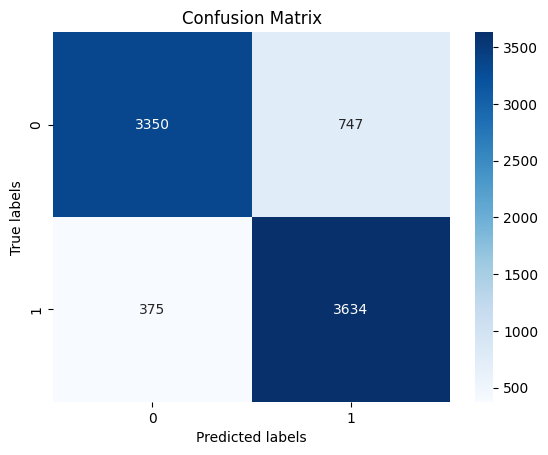

In [24]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_matrix, y_train)

# Make predictions
y_pred = nb_classifier.predict(test_tf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            )
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


filename = 'MN_1.pkl'
pickle.dump(nb_classifier, open(filename, 'wb'))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class AdvancedLSTMClassifier:
    def __init__(self, vocab_size=10000, max_length=100, embedding_dim=128, lstm_units=64):
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.embedding_dim = embedding_dim
        self.lstm_units = lstm_units
        self.tokenizer = None
        self.label_encoder = None
        self.model = None
        self.history = None
        
    def preprocess_data(self, X_train, X_test, y_train, y_test):
        """Preprocess text data and labels"""
        print("Preprocessing data...")
        
        # Initialize and fit tokenizer
        self.tokenizer = Tokenizer(num_words=self.vocab_size, oov_token='<OOV>')
        self.tokenizer.fit_on_texts(X_train)
        
        # Convert texts to sequences
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)
        
        # Pad sequences
        X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')
        
        # Encode labels
        self.label_encoder = LabelEncoder()
        y_train_encoded = self.label_encoder.fit_transform(y_train)
        y_test_encoded = self.label_encoder.transform(y_test)
        
        # Get number of classes
        self.num_classes = len(self.label_encoder.classes_)
        
        print(f"Vocabulary size: {len(self.tokenizer.word_index)}")
        print(f"Number of classes: {self.num_classes}")
        print(f"Training samples: {X_train_pad.shape[0]}")
        print(f"Test samples: {X_test_pad.shape[0]}")
        print(f"Sequence length: {self.max_length}")
        
        return X_train_pad, X_test_pad, y_train_encoded, y_test_encoded
    
    def build_model(self):
        """Build advanced LSTM model"""
        print("Building LSTM model...")
        
        model = Sequential([
            # Embedding layer
            Embedding(input_dim=self.vocab_size, 
                     output_dim=self.embedding_dim, 
                     input_length=self.max_length,
                     mask_zero=True),
            
            # Bidirectional LSTM layers
            Bidirectional(LSTM(self.lstm_units, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
            Bidirectional(LSTM(self.lstm_units//2, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
            
            # Global Max Pooling
            GlobalMaxPooling1D(),
            
            # Dense layers with dropout
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.3),
            
            # Output layer - Fixed for binary classification
            Dense(1 if self.num_classes == 2 else self.num_classes, 
                  activation='sigmoid' if self.num_classes == 2 else 'softmax')
        ])
        
        # Compile model - Fixed loss function selection
        optimizer = Adam(learning_rate=0.001)
        if self.num_classes == 2:
            loss = 'binary_crossentropy'
        else:
            loss = 'sparse_categorical_crossentropy'
        metrics = ['accuracy']
        
        model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
        self.model = model
        print(model.summary())
        
        return model
    
    def train_model(self, X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
        """Train the LSTM model with callbacks"""
        print("Training model...")
        
        # Callbacks
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1),
            ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
        ]
        
        # Train model
        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=1
        )
        
        print("Training completed!")
        return self.history
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate model and generate metrics"""
        print("Evaluating model...")
        
        # Predictions
        y_pred_proba = self.model.predict(X_test)
        
        if self.num_classes == 2:
            # Binary classification
            y_pred = (y_pred_proba > 0.5).astype(int).flatten()
        else:
            # Multi-class classification
            y_pred = np.argmax(y_pred_proba, axis=1)
        
        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted' if self.num_classes > 2 else 'binary')
        
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test F1-Score: {f1:.4f}")
        
        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, 
                                  target_names=self.label_encoder.classes_))
        
        return y_pred, y_pred_proba, accuracy, f1
    
    def plot_training_history(self):
        """Plot training history"""
        if self.history is None:
            print("No training history available!")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Training & Validation Loss
        axes[0, 0].plot(self.history.history['loss'], label='Training Loss', color='blue')
        axes[0, 0].plot(self.history.history['val_loss'], label='Validation Loss', color='red')
        axes[0, 0].set_title('Model Loss')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Training & Validation Accuracy
        axes[0, 1].plot(self.history.history['accuracy'], label='Training Accuracy', color='blue')
        axes[0, 1].plot(self.history.history['val_accuracy'], label='Validation Accuracy', color='red')
        axes[0, 1].set_title('Model Accuracy')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Accuracy')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # Learning Rate (if available)
        if 'lr' in self.history.history:
            axes[1, 0].plot(self.history.history['lr'], color='green')
            axes[1, 0].set_title('Learning Rate')
            axes[1, 0].set_xlabel('Epoch')
            axes[1, 0].set_ylabel('Learning Rate')
            axes[1, 0].set_yscale('log')
            axes[1, 0].grid(True)
        else:
            axes[1, 0].text(0.5, 0.5, 'Learning Rate\nNot Available', 
                          ha='center', va='center', transform=axes[1, 0].transAxes)
        
        # Model Architecture Visualization
        axes[1, 1].text(0.5, 0.5, f'Model Architecture\n\nLayers: {len(self.model.layers)}\n'
                                  f'Parameters: {self.model.count_params():,}\n'
                                  f'Vocab Size: {self.vocab_size}\n'
                                  f'Max Length: {self.max_length}', 
                      ha='center', va='center', transform=axes[1, 1].transAxes)
        
        plt.tight_layout()
        plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_confusion_matrix(self, y_true, y_pred):
        """Plot confusion matrix"""
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=self.label_encoder.classes_,
                   yticklabels=self.label_encoder.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return cm
    
    def save_model_and_components(self, model_name="lstm_text_classifier"):
        """Save model and preprocessing components"""
        print("Saving model and components...")
        
        # Save model
        self.model.save(f'{model_name}.h5')
        
        # Save tokenizer
        with open(f'{model_name}_tokenizer.pkl', 'wb') as f:
            pickle.dump(self.tokenizer, f)
        
        # Save label encoder
        with open(f'{model_name}_label_encoder.pkl', 'wb') as f:
            pickle.dump(self.label_encoder, f)
        
        # Save model parameters
        params = {
            'vocab_size': self.vocab_size,
            'max_length': self.max_length,
            'embedding_dim': self.embedding_dim,
            'lstm_units': self.lstm_units,
            'num_classes': self.num_classes
        }
        
        with open(f'{model_name}_params.pkl', 'wb') as f:
            pickle.dump(params, f)
        
        print(f"Model saved as {model_name}.h5")
        print(f"Components saved as {model_name}_*.pkl")
    
    def load_model_and_components(self, model_name="lstm_text_classifier"):
        """Load model and preprocessing components"""
        print("Loading model and components...")
        
        # Load model
        self.model = tf.keras.models.load_model(f'{model_name}.h5')
        
        # Load tokenizer
        with open(f'{model_name}_tokenizer.pkl', 'rb') as f:
            self.tokenizer = pickle.load(f)
        
        # Load label encoder
        with open(f'{model_name}_label_encoder.pkl', 'rb') as f:
            self.label_encoder = pickle.load(f)
        
        # Load parameters
        with open(f'{model_name}_params.pkl', 'rb') as f:
            params = pickle.load(f)
            
        self.vocab_size = params['vocab_size']
        self.max_length = params['max_length']
        self.embedding_dim = params['embedding_dim']
        self.lstm_units = params['lstm_units']
        self.num_classes = params['num_classes']
        
        print("Model and components loaded successfully!")
    
    def predict_text(self, texts):
        """Predict on new texts"""
        if isinstance(texts, str):
            texts = [texts]
        
        # Preprocess texts
        sequences = self.tokenizer.texts_to_sequences(texts)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding='post')
        
        # Predict
        predictions = self.model.predict(padded)
        
        if self.num_classes == 2:
            # Binary classification
            predicted_classes = (predictions > 0.5).astype(int).flatten()
            predicted_labels = self.label_encoder.inverse_transform(predicted_classes)
        else:
            # Multi-class classification
            predicted_classes = np.argmax(predictions, axis=1)
            predicted_labels = self.label_encoder.inverse_transform(predicted_classes)
        
        return predicted_labels, predictions

# Usage Example
def main():
    # Assuming you have your data ready
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)
    
    # Initialize classifier
    classifier = AdvancedLSTMClassifier(
        vocab_size=10000,
        max_length=100,
        embedding_dim=128,
        lstm_units=64
    )
    
    # Preprocess data
    X_train_processed, X_test_processed, y_train_processed, y_test_processed = classifier.preprocess_data(
        X_train, X_test, y_train, y_test
    )
    
    # Build model
    classifier.build_model()
    
    # Train model
    classifier.train_model(
        X_train_processed, X_test_processed, 
        y_train_processed, y_test_processed,
        epochs=5, batch_size=32
    )
    
    # Evaluate model
    y_pred, y_pred_proba, accuracy, f1 = classifier.evaluate_model(X_test_processed, y_test_processed)
    
    # Plot results
    classifier.plot_training_history()
    classifier.plot_confusion_matrix(y_test_processed, y_pred)
    
    # Save model
    classifier.save_model_and_components("advanced_lstm_classifier")
    
    # Example prediction
    sample_texts = ["This is a sample text for prediction"]
    predicted_labels, probabilities = classifier.predict_text(sample_texts)
    print(f"Predicted labels: {predicted_labels}")
    print(f"Probabilities: {probabilities}")

# For Kaggle GPU optimization
def setup_gpu():
    """Setup GPU for Kaggle environment"""
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Enable memory growth
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f"GPU available: {len(gpus)} GPU(s)")
        except RuntimeError as e:
            print(e)
    else:
        print("No GPU available, using CPU")

# Setup GPU if available
setup_gpu()

# Uncomment to run the main function
if __name__ == "__main__":
    main()

GPU available: 1 GPU(s)
Preprocessing data...
Vocabulary size: 40752
Number of classes: 2
Training samples: 32420
Test samples: 8106
Sequence length: 100
Building LSTM model...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Training model...
Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.8194 - loss: 0.3800
Epoch 1: val_loss improved from inf to 0.22572, saving model to best_lstm_model.h5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 1042s 1s/step - accuracy: 0.8194 - loss: 0.3799 - val_accuracy: 0.9044 - val_loss: 0.2257 - learning_rate: 0.0010
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 0s 971ms/step - accuracy: 0.9218 - loss: 0.1891
Epoch 2: val_loss did not improve from 0.22572
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 1023s 1s/step - accuracy: 0.9218 - loss: 0.1891 - val_accuracy: 0.9080 - val_loss: 0.2535 - learning_rate: 0.0010
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 0s 969ms/step - accuracy: 0.9499 - loss: 0.1296
Epoch 3: val_loss did not improve from 0.22572
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 1020s 1s/step - accuracy: 0.9499 - loss: 0.1296 - val_accuracy: 0.9086 - val_loss: 0.2687 - learning_rate: 0.0010
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.9619 - loss: 0.0978
Epoch 4: 

In [32]:
!zip -r fake_review.zip /kaggle/working/

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/best_lstm_model.h5 (deflated 6%)
  adding: kaggle/working/MN_1.pkl (deflated 45%)
  adding: kaggle/working/tfidf_vectorizer.pkl (deflated 59%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)


In [35]:
from IPython.display import FileLink
FileLink(r'fake_review.zip')

/kaggle/working/fake_review.zip

2025-06-18 12:22:05.530625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750249325.704183      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750249325.756771      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


🚀 LSTM MODEL EVALUATION AND COMPONENT SAVER
Loading trained model from /kaggle/input/fake-reviews-models/best_lstm_model.h5...


I0000 00:00:1750249336.913385      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


✅ Model loaded successfully!
Model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 100, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 100, 64)             │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,436,675 (5.48 MB)

 Trainable params: 1,436,673 (5.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Preparing data and creating components...
Data split: 32420 train, 8106 test samples
✅ Data preprocessing completed!
Vocabulary size: 40,752
Number of classes: 2
Class labels: [0, 1]
Training samples: 32,420
Test samples: 8,106
Sequence length: 100

🔍 EVALUATING MODEL
Making predictions...

📊 PERFORMANCE METRICS:
🎯 Test Accuracy: 0.9044 (90.44%)
🎯 Test F1-Score: 0.9033
🎯 Average Confidence: 0.9205

📋 DETAILED CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4031
           1       0.92      0.89      0.90      4075

    accuracy                           0.90      8106
   macro avg       0.90      0.90      0.90      8106
weighted avg       0.90      0.90      0.90      8106


🏷️ PER-CLASS PERFORMANCE:
------------------------------
Class '0': 0.9211 accuracy (4031 samples)
Class '1': 0.8879 accuracy (4075 samples)

📈 Creating confusion matrix...
✅ Confusion 

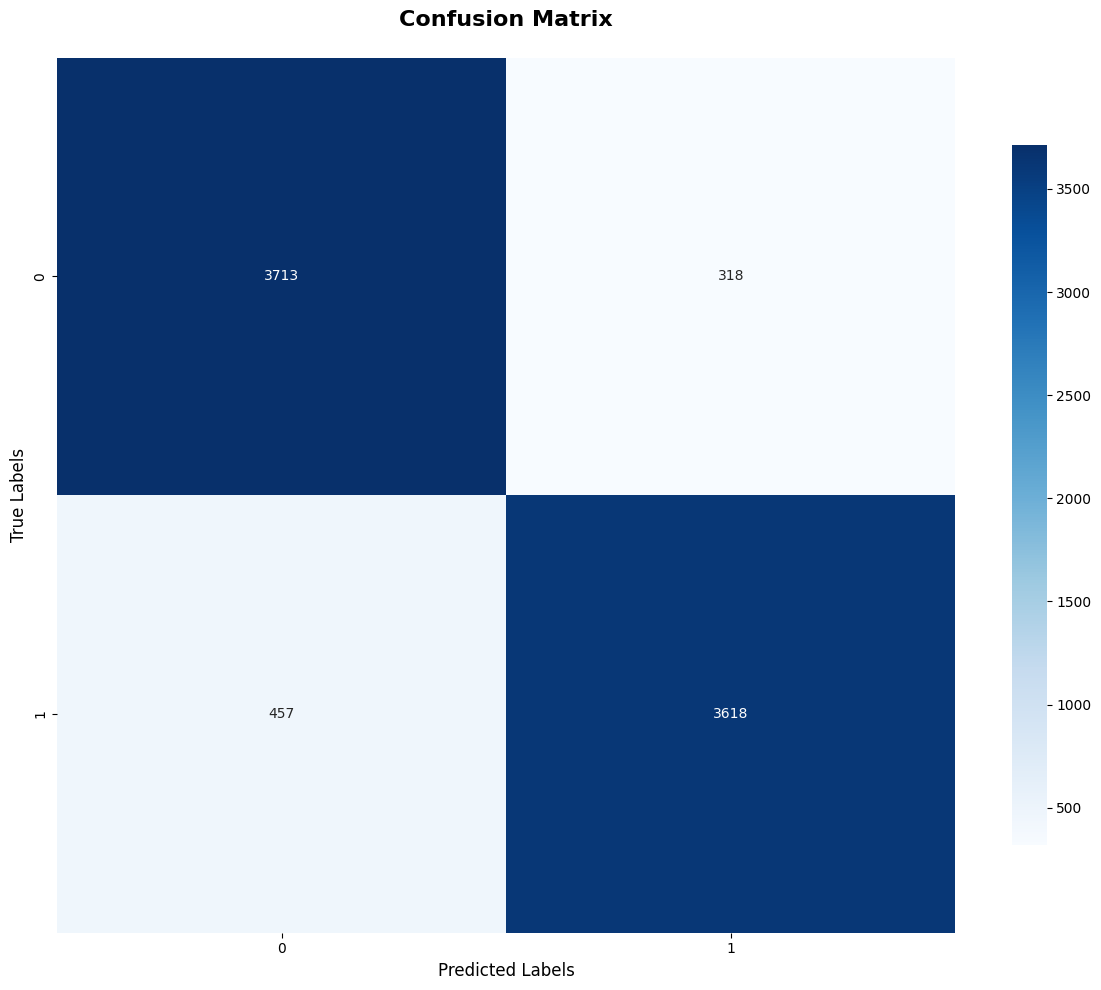


📊 Creating confidence distribution plot...
✅ Confidence distribution saved as 'confidence_distribution.png'


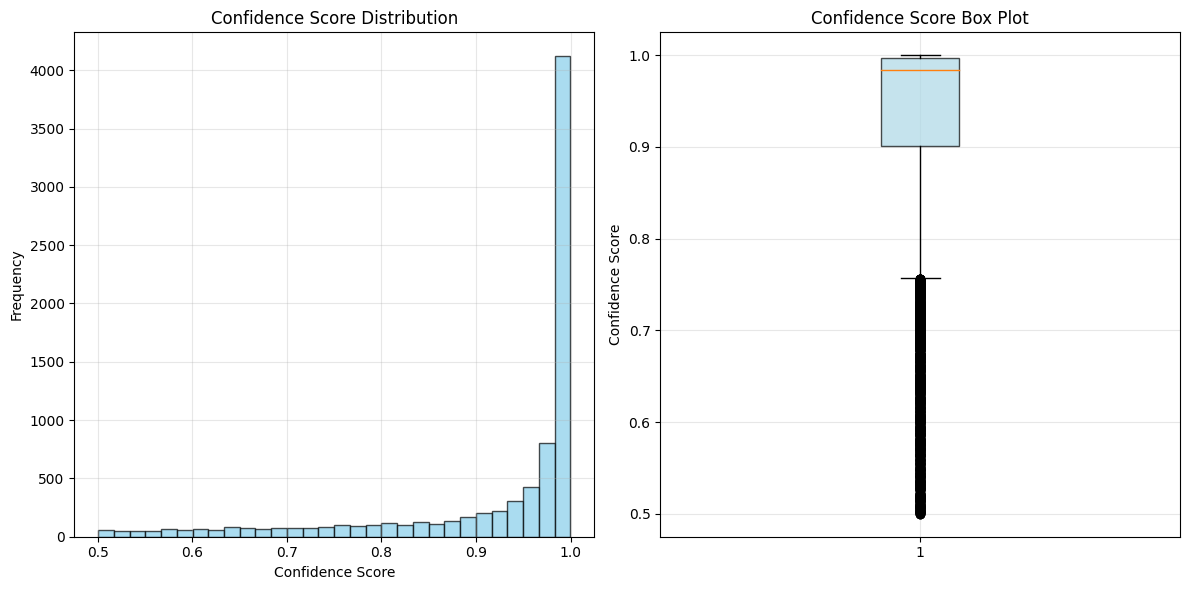


📊 Creating class distribution plot...
✅ Class distribution saved as 'class_distribution.png'


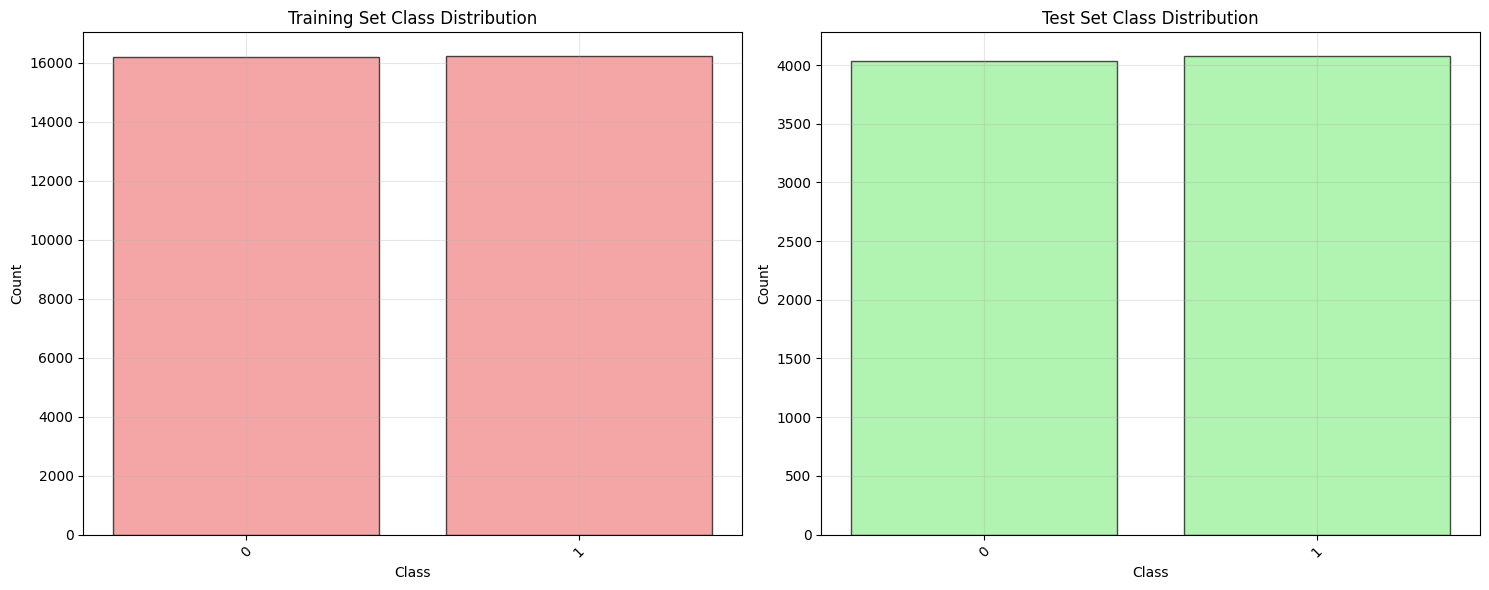


💾 SAVING ALL COMPONENTS...
----------------------------------------
✅ Model saved as 'best_lstm_model.h5'
✅ Tokenizer saved as 'best_lstm_model_tokenizer.pkl'
✅ Label encoder saved as 'best_lstm_model_label_encoder.pkl'
✅ Parameters saved as 'best_lstm_model_params.pkl'


✅ Model summary saved as 'best_lstm_model_summary.txt'

🎉 ALL COMPONENTS SAVED SUCCESSFULLY!
📁 Files created:
   • best_lstm_model.h5
   • best_lstm_model_tokenizer.pkl
   • best_lstm_model_label_encoder.pkl
   • best_lstm_model_params.pkl
   • best_lstm_model_summary.txt

🧪 TESTING WITH SAMPLE TEXTS...
----------------------------------------

📝 Text 1: 'This product is amazing! I love it so much.'
🎯 Prediction: 0
📊 Confidence: 0.9474 (94.74%)

📝 Text 2: 'Terrible quality, waste of money.'
🎯 Prediction: 0
📊 Confidence: 0.6207 (62.07%)

📝 Text 3: 'Average product, nothing special but okay.'
🎯 Prediction: 0
📊 Confidence: 0.7054 (70.54%)

📝 Text 4: 'Outstanding service and fast delivery!'
🎯 Prediction: 0
📊 Confidence: 0.8815 (88.15%)

📝 Text 5: 'Poor customer support, very disappointed.'
🎯 Prediction: 0
📊 Confidence: 0.6290 (62.90%)

✅ EVALUATION COMPLETED SUCCESSFULLY!
📊 Final Results:
   • Accuracy: 0.9044 (90.44%)
   • F1-Score: 0.9033
   • Average Confidence: 0.9205


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class ModelEvaluatorAndSaver:
    def __init__(self, vocab_size=10000, max_length=100, embedding_dim=128, lstm_units=64):
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.embedding_dim = embedding_dim
        self.lstm_units = lstm_units
        self.tokenizer = None
        self.label_encoder = None
        self.model = None
        self.num_classes = None
        
    def load_trained_model(self, model_path="best_lstm_model.h5"):
        """Load the trained model"""
        print(f"Loading trained model from {model_path}...")
        try:
            self.model = tf.keras.models.load_model(model_path)
            print("✅ Model loaded successfully!")
            print(f"Model summary:")
            self.model.summary()
            return True
        except Exception as e:
            print(f"❌ Error loading model: {str(e)}")
            return False
    
    def prepare_data_and_components(self, df, text_column='text', label_column='label', test_size=0.2):
        """Prepare data and create tokenizer/label encoder components"""
        print("Preparing data and creating components...")
        
        # Split data (same as your training split)
        X_train, X_test, y_train, y_test = train_test_split(
            df[text_column], df[label_column], 
            test_size=test_size, 
            random_state=42
        )
        
        print(f"Data split: {len(X_train)} train, {len(X_test)} test samples")
        
        # Create and fit tokenizer
        self.tokenizer = Tokenizer(num_words=self.vocab_size, oov_token='<OOV>')
        self.tokenizer.fit_on_texts(X_train)
        
        # Convert texts to sequences
        X_train_seq = self.tokenizer.texts_to_sequences(X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(X_test)
        
        # Pad sequences
        X_train_pad = pad_sequences(X_train_seq, maxlen=self.max_length, padding='post')
        X_test_pad = pad_sequences(X_test_seq, maxlen=self.max_length, padding='post')
        
        # Create and fit label encoder
        self.label_encoder = LabelEncoder()
        y_train_encoded = self.label_encoder.fit_transform(y_train)
        y_test_encoded = self.label_encoder.transform(y_test)
        
        # Get number of classes
        self.num_classes = len(self.label_encoder.classes_)
        
        print(f"✅ Data preprocessing completed!")
        print(f"Vocabulary size: {len(self.tokenizer.word_index):,}")
        print(f"Number of classes: {self.num_classes}")
        print(f"Class labels: {list(self.label_encoder.classes_)}")
        print(f"Training samples: {X_train_pad.shape[0]:,}")
        print(f"Test samples: {X_test_pad.shape[0]:,}")
        print(f"Sequence length: {self.max_length}")
        
        return X_train_pad, X_test_pad, y_train_encoded, y_test_encoded, X_train, X_test, y_train, y_test
    
    def evaluate_model(self, X_test, y_test):
        """Evaluate model and generate comprehensive metrics"""
        print("\n" + "="*50)
        print("🔍 EVALUATING MODEL")
        print("="*50)
        
        # Predictions
        print("Making predictions...")
        y_pred_proba = self.model.predict(X_test, verbose=0)
        
        if self.num_classes == 2:
            # Binary classification
            y_pred = (y_pred_proba > 0.5).astype(int).flatten()
            confidence_scores = np.maximum(y_pred_proba.flatten(), 1 - y_pred_proba.flatten())
        else:
            # Multi-class classification
            y_pred = np.argmax(y_pred_proba, axis=1)
            confidence_scores = np.max(y_pred_proba, axis=1)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        
        if self.num_classes == 2:
            f1 = f1_score(y_test, y_pred, average='binary')
        else:
            f1 = f1_score(y_test, y_pred, average='weighted')
        
        print(f"\n📊 PERFORMANCE METRICS:")
        print(f"🎯 Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
        print(f"🎯 Test F1-Score: {f1:.4f}")
        print(f"🎯 Average Confidence: {np.mean(confidence_scores):.4f}")
        
        # Classification Report (with proper string conversion)
        print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
        print("-" * 50)
        target_names = [str(class_name) for class_name in self.label_encoder.classes_]
        class_report = classification_report(y_test, y_pred, target_names=target_names)
        print(class_report)
        
        # Per-class performance
        print(f"\n🏷️ PER-CLASS PERFORMANCE:")
        print("-" * 30)
        unique_labels = np.unique(y_test)
        for label in unique_labels:
            mask = y_test == label
            class_name = self.label_encoder.inverse_transform([label])[0]
            class_accuracy = accuracy_score(y_test[mask], y_pred[mask])
            class_count = np.sum(mask)
            print(f"Class '{class_name}': {class_accuracy:.4f} accuracy ({class_count} samples)")
        
        return y_pred, y_pred_proba, accuracy, f1, confidence_scores
    
    def plot_confusion_matrix(self, y_true, y_pred, save_path='confusion_matrix.png'):
        """Plot and save confusion matrix"""
        print(f"\n📈 Creating confusion matrix...")
        
        cm = confusion_matrix(y_true, y_pred)
        
        # Create figure
        plt.figure(figsize=(12, 10))
        
        # Create heatmap
        target_names = [str(class_name) for class_name in self.label_encoder.classes_]
        sns.heatmap(cm, 
                   annot=True, 
                   fmt='d', 
                   cmap='Blues',
                   xticklabels=target_names,
                   yticklabels=target_names,
                   cbar_kws={'shrink': 0.8})
        
        plt.title('Confusion Matrix\n', fontsize=16, fontweight='bold')
        plt.xlabel('Predicted Labels', fontsize=12)
        plt.ylabel('True Labels', fontsize=12)
        plt.tight_layout()
        
        # Save plot
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Confusion matrix saved as '{save_path}'")
        plt.show()
        
        return cm
    
    def plot_prediction_confidence_distribution(self, confidence_scores, save_path='confidence_distribution.png'):
        """Plot confidence score distribution"""
        print(f"\n📊 Creating confidence distribution plot...")
        
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        plt.hist(confidence_scores, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        plt.title('Confidence Score Distribution')
        plt.xlabel('Confidence Score')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        
        # Box plot
        plt.subplot(1, 2, 2)
        plt.boxplot(confidence_scores, vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
        plt.title('Confidence Score Box Plot')
        plt.ylabel('Confidence Score')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Confidence distribution saved as '{save_path}'")
        plt.show()
    
    def plot_class_distribution(self, y_train, y_test, save_path='class_distribution.png'):
        """Plot class distribution in train and test sets"""
        print(f"\n📊 Creating class distribution plot...")
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Training set distribution
        train_counts = pd.Series(y_train).value_counts().sort_index()
        axes[0].bar(range(len(train_counts)), train_counts.values, 
                   color='lightcoral', alpha=0.7, edgecolor='black')
        axes[0].set_title('Training Set Class Distribution')
        axes[0].set_xlabel('Class')
        axes[0].set_ylabel('Count')
        axes[0].set_xticks(range(len(train_counts)))
        axes[0].set_xticklabels([str(self.label_encoder.inverse_transform([i])[0]) 
                                for i in train_counts.index], rotation=45)
        axes[0].grid(True, alpha=0.3)
        
        # Test set distribution
        test_counts = pd.Series(y_test).value_counts().sort_index()
        axes[1].bar(range(len(test_counts)), test_counts.values, 
                   color='lightgreen', alpha=0.7, edgecolor='black')
        axes[1].set_title('Test Set Class Distribution')
        axes[1].set_xlabel('Class')
        axes[1].set_ylabel('Count')
        axes[1].set_xticks(range(len(test_counts)))
        axes[1].set_xticklabels([str(self.label_encoder.inverse_transform([i])[0]) 
                                for i in test_counts.index], rotation=45)
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"✅ Class distribution saved as '{save_path}'")
        plt.show()
    
    def save_all_components(self, model_name="best_lstm_model"):
        """Save model and all preprocessing components"""
        print(f"\n💾 SAVING ALL COMPONENTS...")
        print("-" * 40)
        
        try:
            # Save model (if not already saved)
            model_path = f'{model_name}.h5'
            self.model.save(model_path)
            print(f"✅ Model saved as '{model_path}'")
            
            # Save tokenizer
            tokenizer_path = f'{model_name}_tokenizer.pkl'
            with open(tokenizer_path, 'wb') as f:
                pickle.dump(self.tokenizer, f)
            print(f"✅ Tokenizer saved as '{tokenizer_path}'")
            
            # Save label encoder
            label_encoder_path = f'{model_name}_label_encoder.pkl'
            with open(label_encoder_path, 'wb') as f:
                pickle.dump(self.label_encoder, f)
            print(f"✅ Label encoder saved as '{label_encoder_path}'")
            
            # Save model parameters
            params = {
                'vocab_size': self.vocab_size,
                'max_length': self.max_length,
                'embedding_dim': self.embedding_dim,
                'lstm_units': self.lstm_units,
                'num_classes': self.num_classes,
                'class_names': list(self.label_encoder.classes_)
            }
            
            params_path = f'{model_name}_params.pkl'
            with open(params_path, 'wb') as f:
                pickle.dump(params, f)
            print(f"✅ Parameters saved as '{params_path}'")
            
            # Create a summary file
            summary_path = f'{model_name}_summary.txt'
            with open(summary_path, 'w') as f:
                f.write("LSTM Text Classifier Model Summary\n")
                f.write("=" * 40 + "\n\n")
                f.write(f"Model Name: {model_name}\n")
                f.write(f"Vocabulary Size: {self.vocab_size:,}\n")
                f.write(f"Max Sequence Length: {self.max_length}\n")
                f.write(f"Embedding Dimension: {self.embedding_dim}\n")
                f.write(f"LSTM Units: {self.lstm_units}\n")
                f.write(f"Number of Classes: {self.num_classes}\n")
                f.write(f"Class Names: {list(self.label_encoder.classes_)}\n")
                f.write(f"Total Parameters: {self.model.count_params():,}\n")
                f.write(f"\nModel Architecture:\n")
                self.model.summary(print_fn=lambda x: f.write(x + '\n'))
            
            print(f"✅ Model summary saved as '{summary_path}'")
            
            print(f"\n🎉 ALL COMPONENTS SAVED SUCCESSFULLY!")
            print(f"📁 Files created:")
            print(f"   • {model_path}")
            print(f"   • {tokenizer_path}")
            print(f"   • {label_encoder_path}")
            print(f"   • {params_path}")
            print(f"   • {summary_path}")
            
            return True
            
        except Exception as e:
            print(f"❌ Error saving components: {str(e)}")
            return False
    
    def predict_sample_texts(self, sample_texts):
        """Test the model with sample texts"""
        print(f"\n🧪 TESTING WITH SAMPLE TEXTS...")
        print("-" * 40)
        
        if isinstance(sample_texts, str):
            sample_texts = [sample_texts]
        
        # Preprocess texts
        sequences = self.tokenizer.texts_to_sequences(sample_texts)
        padded = pad_sequences(sequences, maxlen=self.max_length, padding='post')
        
        # Make predictions
        predictions = self.model.predict(padded, verbose=0)
        
        for i, text in enumerate(sample_texts):
            print(f"\n📝 Text {i+1}: '{text[:100]}{'...' if len(text) > 100 else ''}'")
            
            if self.num_classes == 2:
                # Binary classification
                confidence = float(predictions[i][0])
                predicted_class = int(confidence > 0.5)
                predicted_label = self.label_encoder.inverse_transform([predicted_class])[0]
                display_confidence = confidence if predicted_class == 1 else (1 - confidence)
                
                print(f"🎯 Prediction: {predicted_label}")
                print(f"📊 Confidence: {display_confidence:.4f} ({display_confidence*100:.2f}%)")
                
            else:
                # Multi-class classification
                predicted_class = np.argmax(predictions[i])
                predicted_label = self.label_encoder.inverse_transform([predicted_class])[0]
                confidence = float(np.max(predictions[i]))
                
                print(f"🎯 Prediction: {predicted_label}")
                print(f"📊 Confidence: {confidence:.4f} ({confidence*100:.2f}%)")
                
                # Show top predictions
                top_indices = np.argsort(predictions[i])[::-1][:3]
                print(f"🔝 Top 3 predictions:")
                for j, idx in enumerate(top_indices):
                    label = self.label_encoder.inverse_transform([idx])[0]
                    prob = predictions[i][idx]
                    print(f"   {j+1}. {label}: {prob:.4f} ({prob*100:.2f}%)")

def main(df, model_path="best_lstm_model.h5", model_name="best_lstm_model"):
    """
    Main function to evaluate model and save components
    
    Args:
        df: DataFrame with 'text' and 'label' columns
        model_path: Path to the trained model file
        model_name: Base name for saving components
    """
    
    print("🚀 LSTM MODEL EVALUATION AND COMPONENT SAVER")
    print("=" * 60)
    
    # Initialize evaluator
    evaluator = ModelEvaluatorAndSaver(
        vocab_size=10000,      # Adjust these to match your training
        max_length=100,        # parameters if different
        embedding_dim=128,
        lstm_units=64
    )
    
    # Load trained model
    if not evaluator.load_trained_model(model_path):
        print("❌ Failed to load model. Exiting...")
        return
    
    # Prepare data and components
    (X_train_pad, X_test_pad, y_train_encoded, y_test_encoded, 
     X_train_raw, X_test_raw, y_train_raw, y_test_raw) = evaluator.prepare_data_and_components(df)
    
    # Evaluate model
    y_pred, y_pred_proba, accuracy, f1, confidence_scores = evaluator.evaluate_model(
        X_test_pad, y_test_encoded
    )
    
    # Create visualizations
    evaluator.plot_confusion_matrix(y_test_encoded, y_pred)
    evaluator.plot_prediction_confidence_distribution(confidence_scores)
    evaluator.plot_class_distribution(y_train_encoded, y_test_encoded)
    
    # Save all components
    evaluator.save_all_components(model_name)
    
    # Test with sample texts
    sample_texts = [
        "This product is amazing! I love it so much.",
        "Terrible quality, waste of money.",
        "Average product, nothing special but okay.",
        "Outstanding service and fast delivery!",
        "Poor customer support, very disappointed."
    ]
    
    evaluator.predict_sample_texts(sample_texts)
    
    print(f"\n✅ EVALUATION COMPLETED SUCCESSFULLY!")
    print(f"📊 Final Results:")
    print(f"   • Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   • F1-Score: {f1:.4f}")
    print(f"   • Average Confidence: {np.mean(confidence_scores):.4f}")
    
    return evaluator

# Example usage:
if __name__ == "__main__":

    
    # Run evaluation and save components
    evaluator = main(df, model_path="/kaggle/input/fake-reviews-models/best_lstm_model.h5", model_name="best_lstm_model")
    
 